In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/data/processed/commit_info.csv')
print("Shape:", df.shape)
df.head()

Shape: (8796, 21)


,hash,msg,author,author_date,author_timezone,committer,committer_date,committer_timezone,in_main_branch,merge,...,num_lines_deleted,num_lines_added,num_lines_changed,num_files_changed,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing,commit_type,cwe_id,repo_url
0,f1b6ebaa4ee049d966a9094428096b8f72cd492a,Coverity-CHECKED_RETURN,richard@hughsie.com,2016-09-19 10:03:36+01:00,-3600,richard@hughsie.com,2016-09-19 10:03:36+01:00,-3600,True,False,...,13,35,48,3,0.000000,0.0,0.000000,VCC,CWE-617,https://github.com/mdadams/jasper
1,df5d2867e8004e51e18b89865bc4aa69229227b3,CVE-2015-5221,richard@hughsie.com,2016-09-19 10:03:36+01:00,-3600,richard@hughsie.com,2016-09-19 10:03:36+01:00,-3600,True,False,...,1,1,2,1,NaN,NaN,NaN,FC,CWE-416,https://github.com/mdadams/jasper
2,3c55b399c36ef46befcb21e4ebc4799367f89684,"At many places in the code, jas_malloc or jas_...",mdadams@ece.uvic.ca,2016-10-15 10:42:19-07:00,25200,mdadams@ece.uvic.ca,2016-10-15 10:42:19-07:00,25200,True,False,...,117,173,290,25,0.967742,1.0,0.129032,VCC,CWE-122,https://github.com/mdadams/jasper
3,668e68295306a78a5e428df2ed80027c4eece964,Fix a potential double fclose of a FILE* in th...,mdadams@ece.uvic.ca,2016-10-18 08:11:07-07:00,25200,mdadams@ece.uvic.ca,2016-10-18 08:11:07-07:00,25200,True,False,...,0,6,6,2,0.500000,0.5,0.333333,VCC,CWE-190,https://github.com/mdadams/jasper
4,0c59a93f1b6433f259321939ee5f49eb45aa1e22,Added some extra debugging log messages for me...,mdadams@ece.uvic.ca,2016-10-19 15:29:20-07:00,25200,mdadams@ece.uvic.ca,2016-10-19 15:29:20-07:00,25200,True,False,...,1,4,5,1,1.000000,1.0,1.000000,VCC,CWE-190,https://github.com/mdadams/jasper


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hash                  8796 non-null   object 
 1   msg                   8690 non-null   object 
 2   author                8772 non-null   object 
 3   author_date           8796 non-null   object 
 4   author_timezone       8796 non-null   int64  
 5   committer             8772 non-null   object 
 6   committer_date        8796 non-null   object 
 7   committer_timezone    8796 non-null   int64  
 8   in_main_branch        8796 non-null   bool   
 9   merge                 8796 non-null   bool   
 10  parents               8796 non-null   object 
 11  num_lines_deleted     8796 non-null   int64  
 12  num_lines_added       8796 non-null   int64  
 13  num_lines_changed     8796 non-null   int64  
 14  num_files_changed     8796 non-null   int64  
 15  dmm_unit_size        

In [4]:
df.head(3)

,hash,msg,author,author_date,author_timezone,committer,committer_date,committer_timezone,in_main_branch,merge,...,num_lines_deleted,num_lines_added,num_lines_changed,num_files_changed,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing,commit_type,cwe_id,repo_url
0,f1b6ebaa4ee049d966a9094428096b8f72cd492a,Coverity-CHECKED_RETURN,richard@hughsie.com,2016-09-19 10:03:36+01:00,-3600,richard@hughsie.com,2016-09-19 10:03:36+01:00,-3600,True,False,...,13,35,48,3,0.000000,0.0,0.000000,VCC,CWE-617,https://github.com/mdadams/jasper
1,df5d2867e8004e51e18b89865bc4aa69229227b3,CVE-2015-5221,richard@hughsie.com,2016-09-19 10:03:36+01:00,-3600,richard@hughsie.com,2016-09-19 10:03:36+01:00,-3600,True,False,...,1,1,2,1,NaN,NaN,NaN,FC,CWE-416,https://github.com/mdadams/jasper
2,3c55b399c36ef46befcb21e4ebc4799367f89684,"At many places in the code, jas_malloc or jas_...",mdadams@ece.uvic.ca,2016-10-15 10:42:19-07:00,25200,mdadams@ece.uvic.ca,2016-10-15 10:42:19-07:00,25200,True,False,...,117,173,290,25,0.967742,1.0,0.129032,VCC,CWE-122,https://github.com/mdadams/jasper


In [5]:
print("Unique repos:", df['repo_url'].nunique())
print(df['commit_type'].value_counts())
df.describe()


Unique repos: 710
commit_type
VCC    5934
FC     2862
Name: count, dtype: int64


,author_timezone,committer_timezone,num_lines_deleted,num_lines_added,num_lines_changed,num_files_changed,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
count,8796.000000,8796.000000,8796.000000,8.796000e+03,8.796000e+03,8796.000000,7380.000000,7381.000000,7380.000000
mean,2825.034106,2658.049113,761.765007,7.731434e+03,8.493199e+03,36.229195,0.279083,0.396810,0.553071
std,16380.434146,15837.248715,8825.796345,2.860359e+05,2.863936e+05,780.311354,0.380920,0.413955,0.421530
min,-46800.000000,-46800.000000,0.000000,0.000000e+00,1.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,-7200.000000,-7200.000000,2.000000,1.000000e+01,1.400000e+01,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,11.000000,5.100000e+01,7.500000e+01,3.000000,0.031696,0.252525,0.643952
75%,18000.000000,18000.000000,81.000000,2.920000e+02,4.282500e+02,8.000000,0.500000,0.870510,1.000000
max,39600.000000,28800.000000,398047.000000,2.583498e+07,2.583560e+07,69192.000000,1.000000,1.000000,1.000000


In [6]:
# Percentage of missing values per column
missing = df.isna().mean().sort_values(ascending=False)

print("Columns with missing values:")
display(missing.head(21))


Columns with missing values:


dmm_unit_interfacing    0.160982
dmm_unit_size           0.160982
dmm_unit_complexity     0.160869
msg                     0.012051
author                  0.002729
committer               0.002729
hash                    0.000000
num_lines_added         0.000000
cwe_id                  0.000000
commit_type             0.000000
num_files_changed       0.000000
num_lines_changed       0.000000
parents                 0.000000
num_lines_deleted       0.000000
merge                   0.000000
in_main_branch          0.000000
committer_timezone      0.000000
committer_date          0.000000
author_timezone         0.000000
author_date             0.000000
repo_url                0.000000
dtype: float64

In [7]:
# How many vulnerability-inducing vs. fixing commits
counts = df['commit_type'].value_counts()
print(counts)
print("\nProportion of each class (%):")
print((counts / len(df) * 100).round(2))


commit_type
VCC    5934
FC     2862
Name: count, dtype: int64

Proportion of each class (%):
commit_type
VCC    67.46
FC     32.54
Name: count, dtype: float64


In [8]:
numeric_cols = [
    'num_lines_added', 'num_lines_deleted', 'num_lines_changed',
    'num_files_changed', 'dmm_unit_size', 'dmm_unit_complexity', 'dmm_unit_interfacing'
]

df[numeric_cols].describe(percentiles=[.5, .9, .95, .99])


,num_lines_added,num_lines_deleted,num_lines_changed,num_files_changed,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
count,8.796000e+03,8796.000000,8.796000e+03,8796.000000,7380.000000,7381.000000,7380.000000
mean,7.731434e+03,761.765007,8.493199e+03,36.229195,0.279083,0.396810,0.553071
std,2.860359e+05,8825.796345,2.863936e+05,780.311354,0.380920,0.413955,0.421530
min,0.000000e+00,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,5.100000e+01,11.000000,7.500000e+01,3.000000,0.031696,0.252525,0.643952
90%,1.419000e+03,455.000000,2.147000e+03,29.000000,1.000000,1.000000,1.000000
95%,4.516000e+03,1315.000000,7.224000e+03,76.000000,1.000000,1.000000,1.000000
99%,9.148345e+04,11121.200000,1.026841e+05,464.300000,1.000000,1.000000,1.000000
max,2.583498e+07,398047.000000,2.583560e+07,69192.000000,1.000000,1.000000,1.000000


2006-02-17 15:52:05+01:00 → 2025-03-29 13:18:44+01:00


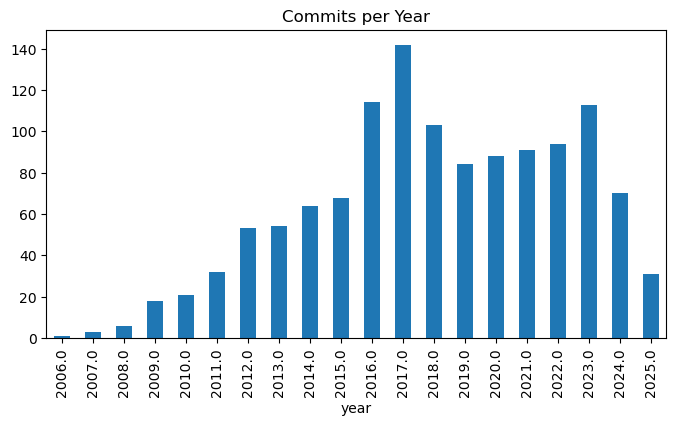

In [10]:
# Convert dates if not already parsed
df['author_date'] = pd.to_datetime(df['author_date'], errors='coerce')

# Quick time span
print(df['author_date'].min(), "→", df['author_date'].max())

# Activity per year
df['year'] = df['author_date'].dt.year
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(8,4), title="Commits per Year")
plt.show()


In [11]:
print("Number of unique repos:", df['repo_url'].nunique())
print("Top 10 most active repositories:")
display(df['repo_url'].value_counts().head(10))

print("\nNumber of unique authors:", df['author'].nunique())
print("Top 10 most active authors:")
display(df['author'].value_counts().head(10))


Number of unique repos: 710
Top 10 most active repositories:


repo_url
https://github.com/tensorflow/tensorflow        829
https://github.com/ImageMagick/ImageMagick      382
https://github.com/FFmpeg/FFmpeg                355
https://github.com/the-tcpdump-group/tcpdump    322
https://github.com/gpac/gpac                    275
https://github.com/radareorg/radare2            239
https://github.com/php/php-src                  179
https://github.com/OISF/suricata                170
https://github.com/openssl/openssl              170
https://github.com/FreeRDP/FreeRDP              153
Name: count, dtype: int64


Number of unique authors: 2518
Top 10 most active authors:


author
gardener@tensorflow.org              166
mihaimaruseac@google.com             165
pancake@nopcode.org                  163
urban-warrior@imagemagick.org        156
jeanlf@gpac.io                       138
urban-warrior@git.imagemagick.org    109
guy@alum.mit.edu                     109
michael@niedermayer.cc                91
jeanlf@users.sourceforge.net          84
roberto@inf.puc-rio.br                58
Name: count, dtype: int64

In [12]:
# Length of commit messages
df['msg_len'] = df['msg'].astype(str).str.len()
df['msg_len'].describe()


count      8796.000000
mean        334.253752
std        6774.868083
min           1.000000
25%          48.000000
50%         109.000000
75%         260.000000
max      629086.000000
Name: msg_len, dtype: float64

In [24]:
df[['msg']].sample(5, random_state=2)

,msg
3164,Update trunk for 2.7
273,Use custom error handler instead of fprintf(st...
622,cli-transaction: Escape any special characters...
5171,Style: uncrusitfy
4096,Fix bug #72340: Double Free Courruption in wdd...


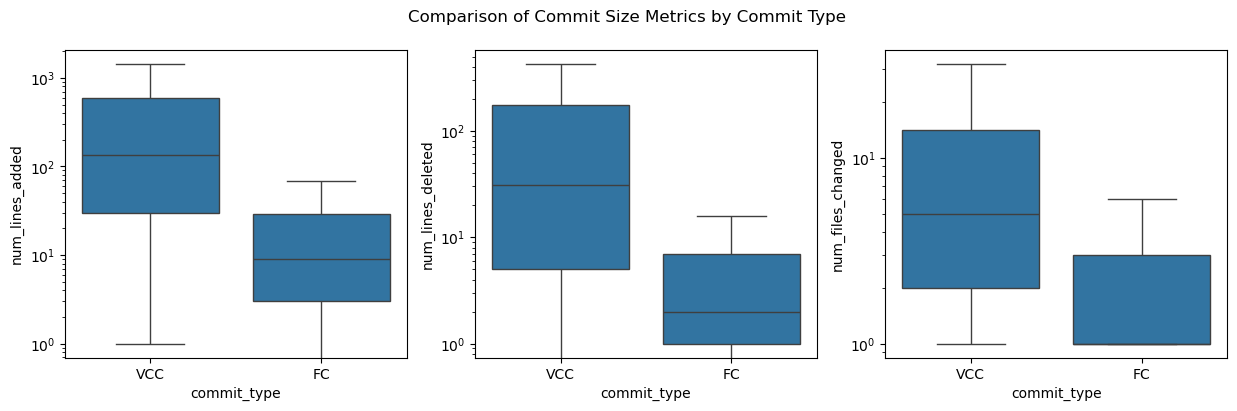

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(data=df, x='commit_type', y='num_lines_added', showfliers=False, ax=axes[0])
sns.boxplot(data=df, x='commit_type', y='num_lines_deleted', showfliers=False, ax=axes[1])
sns.boxplot(data=df, x='commit_type', y='num_files_changed', showfliers=False, ax=axes[2])
for ax in axes: ax.set_yscale('log')
plt.suptitle("Comparison of Commit Size Metrics by Commit Type")
plt.show()
plt.figure(figsize=(8,4))

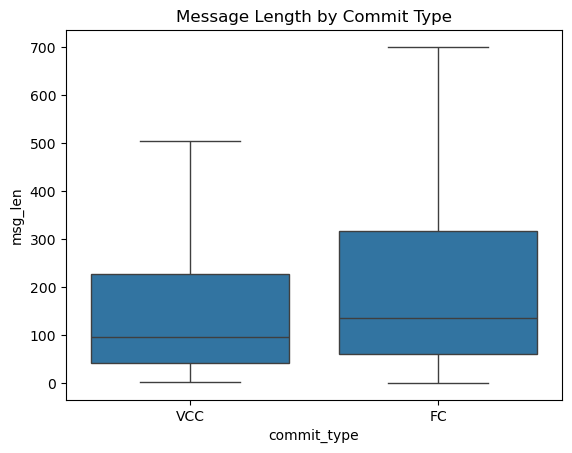

In [15]:
sns.boxplot(data=df, x='commit_type', y='msg_len', showfliers=False)
plt.title("Message Length by Commit Type")
plt.show()


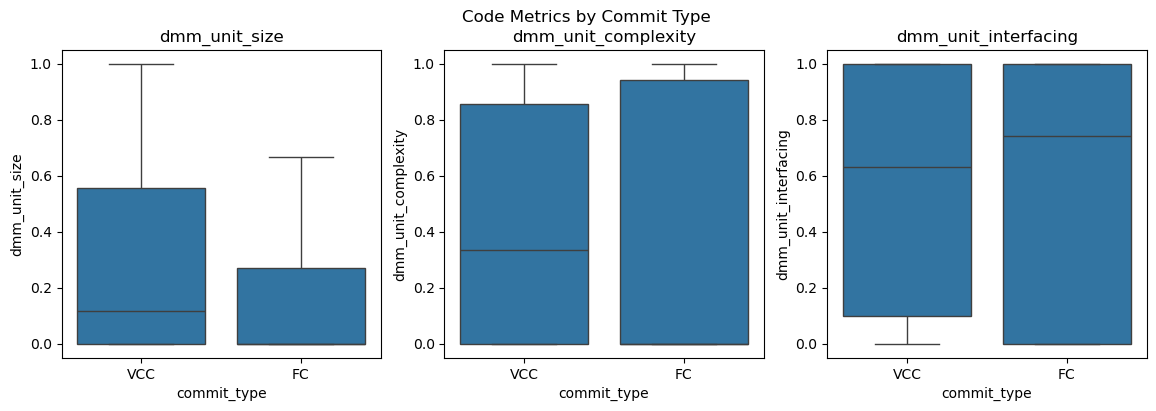

In [16]:
metrics = ['dmm_unit_size','dmm_unit_complexity','dmm_unit_interfacing']
fig, axes = plt.subplots(1, 3, figsize=(14,4))
for i, col in enumerate(metrics):
    sns.boxplot(data=df, x='commit_type', y=col, showfliers=False, ax=axes[i])
    axes[i].set_title(col)
plt.suptitle("Code Metrics by Commit Type")
plt.show()

/var/folders/f_/ps1v2btn63d27h0glvzpqshm0000gn/T/ipykernel_29426/357692024.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['author_date'] = pd.to_datetime(df['author_date'], errors='coerce', infer_datetime_format=True)
/var/folders/f_/ps1v2btn63d27h0glvzpqshm0000gn/T/ipykernel_29426/357692024.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_counts = _plot_df.groupby(['commit_type','weekday']).size().unstack(fill_value=0).reindex(columns=order, fill_value=0)
/var/folders/f_/ps1v2btn63d27h0glvzpqshm0000gn/T/ipykernel_29426/357692024.py:19: FutureWarning: The default

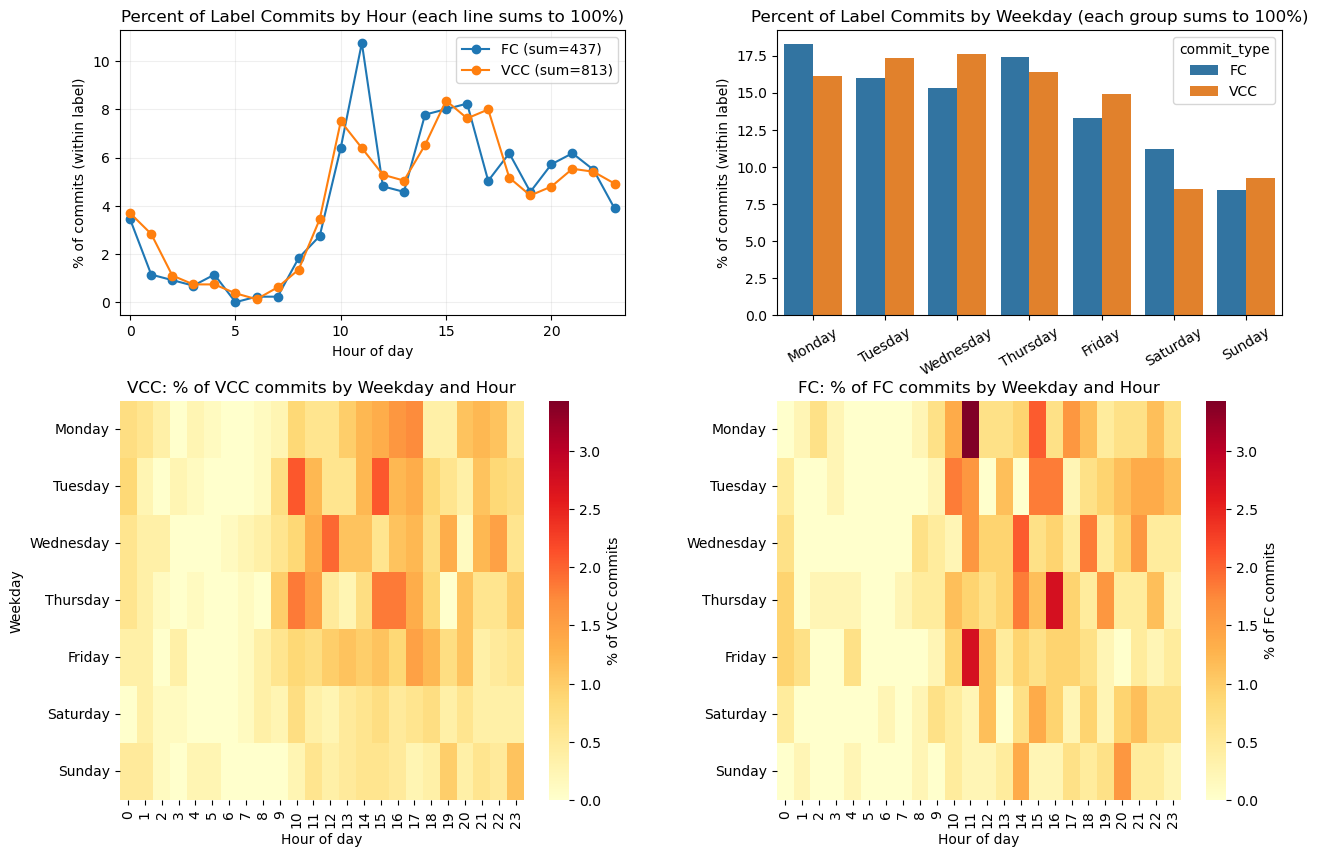

In [17]:
df['author_date'] = pd.to_datetime(df['author_date'], errors='coerce', infer_datetime_format=True)
_plot_df = df.copy()

# derive hour and weekday
_plot_df['hour'] = _plot_df['author_date'].dt.hour
_plot_df['weekday'] = _plot_df['author_date'].dt.day_name()
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
_plot_df['weekday'] = pd.Categorical(_plot_df['weekday'], categories=order, ordered=True)

# Compute hourly percentage per label (percent of that label's commits occurring in each hour)
hour_counts = _plot_df.groupby(['commit_type','hour']).size().unstack(fill_value=0)
hour_pct = hour_counts.div(hour_counts.sum(axis=1), axis=0) * 100  # rows = labels

# Compute weekday percentage per label
weekday_counts = _plot_df.groupby(['commit_type','weekday']).size().unstack(fill_value=0).reindex(columns=order, fill_value=0)
weekday_pct = weekday_counts.div(weekday_counts.sum(axis=1), axis=0) * 100

# Compute weekday x hour pivot tables (percent of label)
pivot_vcc = _plot_df[_plot_df['commit_type']=='VCC'].pivot_table(index='weekday', columns='hour', values='repo_url', aggfunc='count', fill_value=0).reindex(index=order, columns=range(24), fill_value=0)
pivot_fc  = _plot_df[_plot_df['commit_type']=='FC'].pivot_table(index='weekday', columns='hour', values='repo_url', aggfunc='count', fill_value=0).reindex(index=order, columns=range(24), fill_value=0)

# normalize each pivot by its label total
pivot_vcc_pct = pivot_vcc / pivot_vcc.values.sum() * 100 if pivot_vcc.values.sum()>0 else pivot_vcc
pivot_fc_pct  = pivot_fc  / pivot_fc.values.sum()  * 100 if pivot_fc.values.sum()>0  else pivot_fc

# plotting
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1,1.4], hspace=0.25, wspace=0.3)

# hour percentage lines (one line per label)
ax0 = fig.add_subplot(gs[0,0])
for label in hour_pct.index:
    ax0.plot(hour_pct.columns, hour_pct.loc[label], marker='o', label=f"{label} (sum={hour_counts.loc[label].sum():,})")
ax0.set_title('Percent of Label Commits by Hour (each line sums to 100%)')
ax0.set_xlim(-0.5, 23.5)
ax0.set_xlabel('Hour of day')
ax0.set_ylabel('% of commits (within label)')
ax0.legend()
ax0.grid(alpha=0.2)

# weekday percentage bars (grouped)
ax1 = fig.add_subplot(gs[0,1])
wd_long = weekday_pct.reset_index().melt(id_vars='commit_type', var_name='weekday', value_name='pct')
sns.barplot(data=wd_long, x='weekday', y='pct', hue='commit_type', order=order, ax=ax1)
ax1.set_title('Percent of Label Commits by Weekday (each group sums to 100%)')
ax1.set_xlabel('')
ax1.set_ylabel('% of commits (within label)')
ax1.tick_params(axis='x', rotation=30)

# heatmap VCC percent
ax2 = fig.add_subplot(gs[1,0])
vmax = max(pivot_vcc_pct.values.max(), pivot_fc_pct.values.max(), 1)
sns.heatmap(pivot_vcc_pct, cmap='YlOrRd', vmin=0, vmax=vmax, cbar_kws={'label':'% of VCC commits'}, ax=ax2, fmt=".2f")
ax2.set_title('VCC: % of VCC commits by Weekday and Hour')
ax2.set_xlabel('Hour of day')
ax2.set_ylabel('Weekday')

# heatmap FC percent
ax3 = fig.add_subplot(gs[1,1])
sns.heatmap(pivot_fc_pct, cmap='YlOrRd', vmin=0, vmax=vmax, cbar_kws={'label':'% of FC commits'}, ax=ax3, fmt=".2f")
ax3.set_title('FC: % of FC commits by Weekday and Hour')
ax3.set_xlabel('Hour of day')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

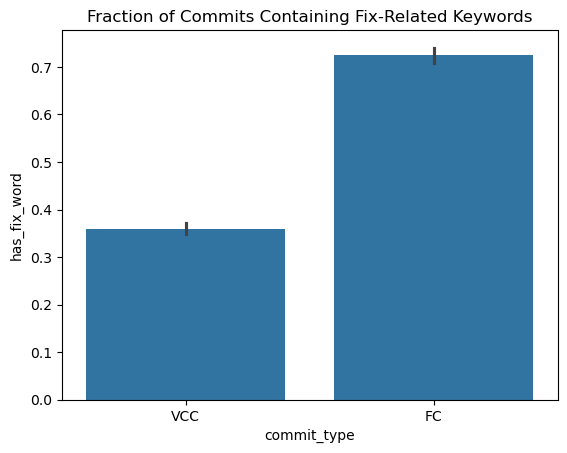

In [27]:
df['has_fix_word'] = df['msg'].str.contains(r'fix|bug|patch|security|overflow|not|working', case=False, na=False)
sns.barplot(x='commit_type', y='has_fix_word', data=df, estimator=np.mean)
plt.title("Fraction of Commits Containing Fix-Related Keywords")
plt.show()


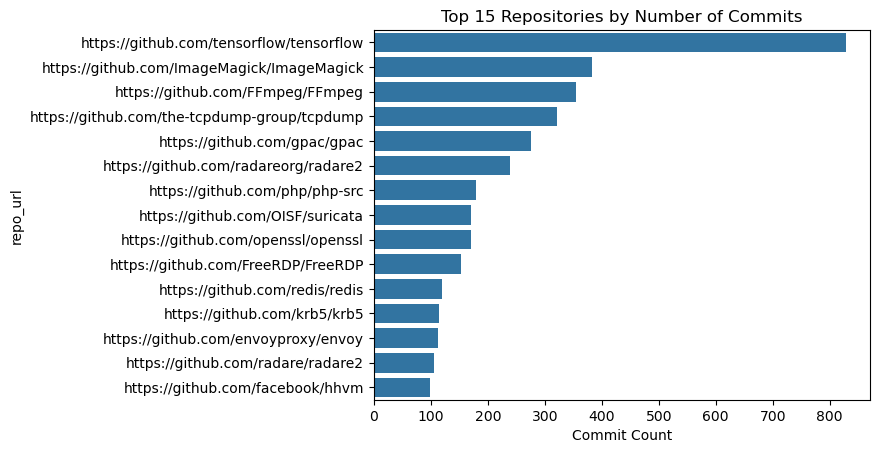

In [20]:
top_repos = df['repo_url'].value_counts().head(15)
sns.barplot(y=top_repos.index, x=top_repos.values, orient='h')
plt.title("Top 15 Repositories by Number of Commits")
plt.xlabel("Commit Count")
plt.show()


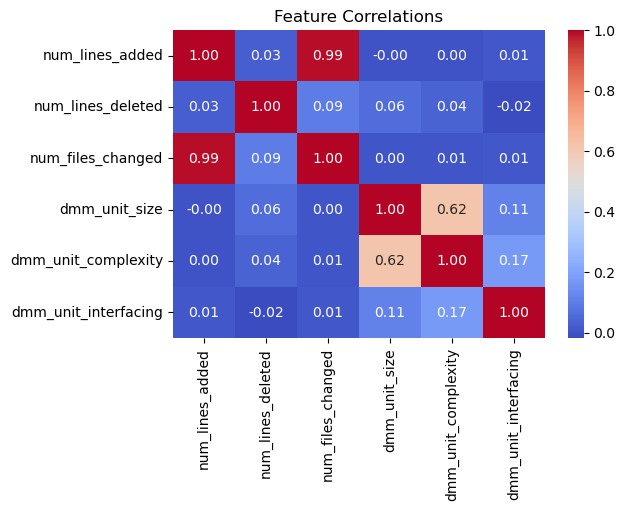

In [21]:
corr = df[['num_lines_added','num_lines_deleted','num_files_changed',
           'dmm_unit_size','dmm_unit_complexity','dmm_unit_interfacing']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations")
plt.show()


In [22]:
from scipy.stats import mannwhitneyu

for col in ['num_lines_changed','num_files_changed','msg_len', 'num_lines_added', 'num_lines_deleted', 'dmm_unit_size','dmm_unit_complexity','dmm_unit_interfacing']:
    vcc = df[df['commit_type']=="VCC"][col].dropna()
    fc  = df[df['commit_type']=="FC"][col].dropna()
    stat, p = mannwhitneyu(vcc, fc, alternative='two-sided')
    print(f"{col}: p={p:.4e}")


num_lines_changed: p=0.0000e+00
num_files_changed: p=0.0000e+00
msg_len: p=4.7170e-36
num_lines_added: p=0.0000e+00
num_lines_deleted: p=0.0000e+00
dmm_unit_size: p=2.9581e-77
dmm_unit_complexity: p=1.6402e-37
dmm_unit_interfacing: p=4.1002e-01
